Loading MatrixMarket (.mtx) file...
Graph loaded successfully!
Nodes: 17206
Edges: 604867

--- BASIC STRUCTURAL PROPERTIES ---
Density: 0.004086535643794365
Average degree: 70.30884575148204
Max degree: 1709
Average clustering coefficient: 0.2019408979087335


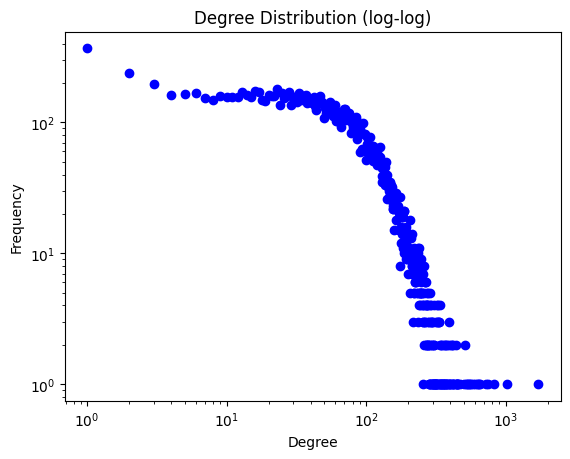


--- CENTRALITIES ---
Computing approximate betweenness (k=300)...
Computing approximate closeness (400 samples)...

Top 5 betweenness:
[(852, 0.050850440039200105), (14539, 0.011471588241500293), (10754, 0.007441729885409802), (13147, 0.006125146740148124), (16568, 0.005884563643150974)]

Top 5 closeness:
[(852, 0.5037783375314862), (14539, 0.4819277108433735), (10754, 0.46893317702227433), (13147, 0.46296296296296297), (16568, 0.4608294930875576)]

--- CONNECTED COMPONENTS ---
Number of components: 1
Largest component: 17206


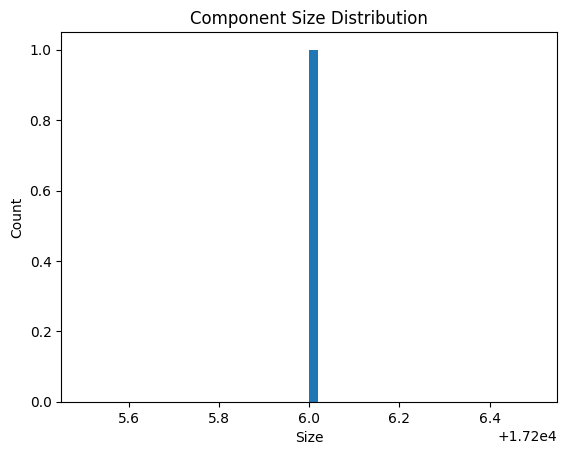


Creating visualization subgraph...

--- Clustering Effect (C(k) vs k) ---


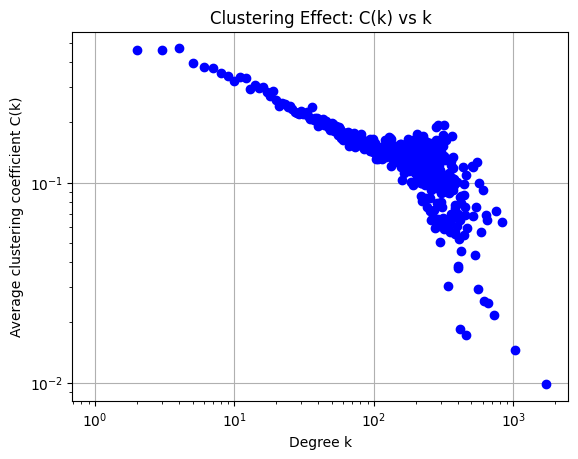

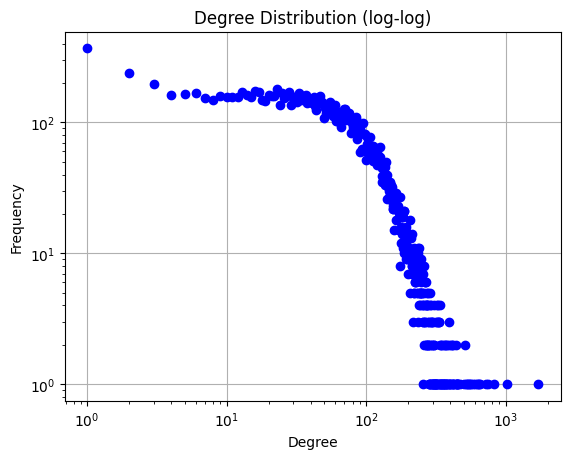


Exporting hub-centered subgraph for Gephi visualization...
Export complete: hub_subgraph_for_gephi.gexf


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import statistics
from scipy.io import mmread  

# =========================
# LOAD .MTX GRAPH
# =========================

FILE = "socfb-UConn.mtx" 

print("Loading MatrixMarket (.mtx) file...")
A = mmread(FILE)                     # SciPy loads sparse matrix
G = nx.from_scipy_sparse_array(A)    # convert to NetworkX Graph

G = nx.Graph(G)                       # ensure simple undirected
G.remove_edges_from(nx.selfloop_edges(G))

print("Graph loaded successfully!")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

# =========================
# a) BASIC STRUCTURAL PROPERTIES
# =========================

# i) N, M, Density
n, m = G.number_of_nodes(), G.number_of_edges()
density = nx.density(G)
print("\n--- BASIC STRUCTURAL PROPERTIES ---")
print("Density:", density)

# ii) Degree statistics
degrees = [d for _, d in G.degree()]
avg_deg = sum(degrees)/n
max_deg = max(degrees)

print("Average degree:", avg_deg)
print("Max degree:", max_deg)

avg_cc = nx.average_clustering(G)
print("Average clustering coefficient:", avg_cc)

deg_count = collections.Counter(degrees)
x, y = zip(*sorted(deg_count.items()))

plt.figure()
plt.loglog(x, y, 'bo')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution (log-log)")
plt.show()


# iii) CENTRALITIES (approx)
print("\n--- CENTRALITIES ---")
print("Computing approximate betweenness (k=300)...")
bet = nx.betweenness_centrality(G, k=300)

print("Computing approximate closeness (400 samples)...")
sample_nodes = list(G.nodes())[:400]
clo = {}
for s in sample_nodes:
    lengths = nx.single_source_shortest_path_length(G, s)
    for node, dist in lengths.items():
        clo[node] = clo.get(node, 0) + dist
clo = {node: (400 / clo[node]) if clo[node] != 0 else 0 for node in clo}

# print("Computing closeness centrality (NetworkX)...")
# clo = nx.closeness_centrality(G, wf_improved=True)


print("\nTop 5 betweenness:")
print(sorted(bet.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 closeness:")
print(sorted(clo.items(), key=lambda x: x[1], reverse=True)[:5])


# v) CONNECTED COMPONENTS
components = list(nx.connected_components(G))
sizes = [len(c) for c in components]

print("\n--- CONNECTED COMPONENTS ---")
print("Number of components:", len(sizes))
print("Largest component:", max(sizes))

plt.figure()
plt.hist(sizes, bins=50)
plt.title("Component Size Distribution")
plt.xlabel("Size")
plt.ylabel("Count")
plt.savefig("component_size.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nCreating visualization subgraph...")


# =========================
# iv) CLUSTERING EFFECT (export)
# =========================

print("\n--- Clustering Effect (C(k) vs k) ---")

clustering = nx.clustering(G)
degree = dict(G.degree())

degree_cc = {}
for node in G.nodes():
    k = degree[node]
    degree_cc.setdefault(k, []).append(clustering[node])

avg_cc_k = {k: sum(v)/len(v) for k, v in degree_cc.items()}

x_ck = sorted(avg_cc_k.keys())
y_ck = [avg_cc_k[k] for k in x_ck]

plt.figure()
plt.loglog(x_ck, y_ck, 'bo')
plt.xlabel("Degree k")
plt.ylabel("Average clustering coefficient C(k)")
plt.title("Clustering Effect: C(k) vs k")
plt.grid(True)

plt.savefig("clustering_effect_loglog.png", dpi=300, bbox_inches="tight")
plt.savefig("clustering_effect_loglog.pdf", bbox_inches="tight")
plt.show()


# -------------------------
# Degree Distribution (export)
# -------------------------

deg_count = collections.Counter(degrees)
x, y = zip(*sorted(deg_count.items()))

plt.figure()
plt.loglog(x, y, 'bo')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution (log-log)")
plt.grid(True)

plt.savefig("degree_distribution_loglog.png", dpi=300, bbox_inches="tight")
plt.savefig("degree_distribution_loglog.pdf", bbox_inches="tight")
plt.show()




# =========================
# vi) HUB SUBGRAPH – EXPORT FOR GEPHI
# =========================

print("\nExporting hub-centered subgraph for Gephi visualization...")

# Select top hubs
hub_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:80]
hub_nodes = [n for n, _ in hub_nodes]

# Include neighbors of hubs
neighbors = set()
for v in hub_nodes:
    neighbors.update(G.neighbors(v))

subgraph_nodes = set(hub_nodes) | neighbors
H = G.subgraph(subgraph_nodes).copy()

# Add attributes for Gephi visualization
for node in H.nodes():
    H.nodes[node]["degree"] = G.degree(node)
    if "community" in G.nodes[node]:
        H.nodes[node]["community"] = G.nodes[node]["community"]
    H.nodes[node]["is_hub"] = node in hub_nodes

# Export subgraph
nx.write_gexf(H, "hub_subgraph_for_gephi.gexf")

print("Export complete: hub_subgraph_for_gephi.gexf")




--- Louvain Community Detection ---
Number of communities: 13
Min size: 3
Avg size: 1323.5384615384614
Max size: 4557
Modularity: 0.4384469149835143


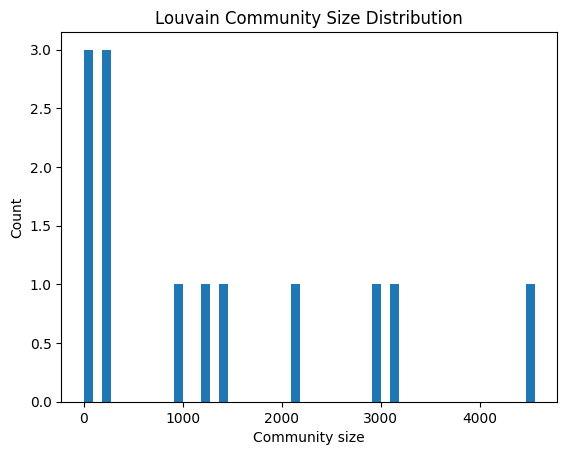

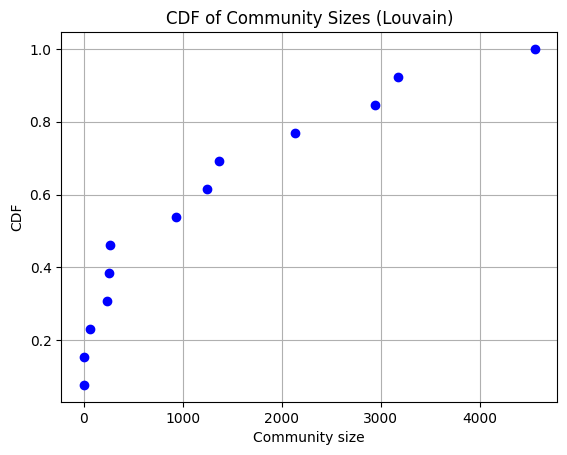


--- Label Propagation Community Detection ---
Number of communities: 13
Min size: 2
Avg size: 1323.5384615384614
Max size: 14395
Modularity: 0.15437093162860344


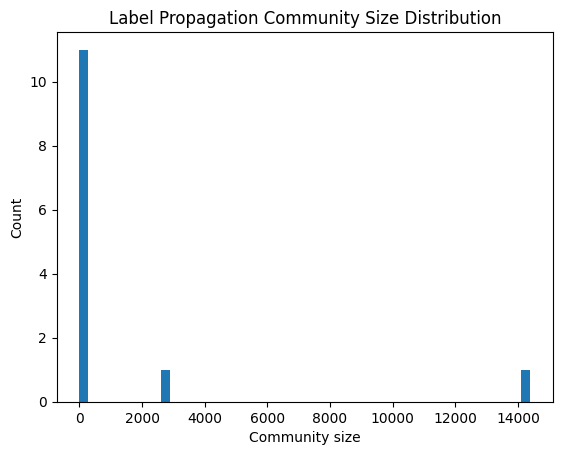

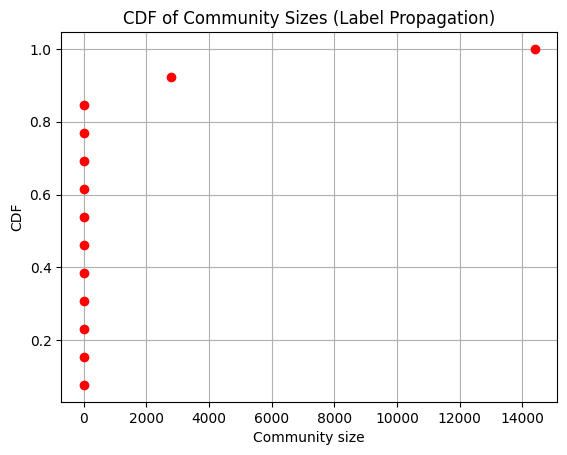


Exporting network with community labels for Gephi...
Export complete: socfb_UConn_with_communities.gexf


In [7]:
from networkx.algorithms.community import (
    louvain_communities,
    asyn_lpa_communities
)

# -------------------------------------------------
# 1) LOUVAIN COMMUNITY DETECTION
# -------------------------------------------------
print("\n--- Louvain Community Detection ---")

communities_louvain = louvain_communities(G, seed=42)
sizes_louvain = [len(c) for c in communities_louvain]
modularity_louvain = nx.algorithms.community.modularity(G, communities_louvain)

print("Number of communities:", len(sizes_louvain))
print("Min size:", min(sizes_louvain))
print("Avg size:", sum(sizes_louvain)/len(sizes_louvain))
print("Max size:", max(sizes_louvain))
print("Modularity:", modularity_louvain)

plt.figure()
plt.hist(sizes_louvain, bins=50)
plt.title("Louvain Community Size Distribution")
plt.xlabel("Community size")
plt.ylabel("Count")
plt.savefig("louvain_community_size_distribution.png",
            dpi=300, bbox_inches="tight")
plt.show()

# -------------------------------------------------
# CDF of Louvain Community Sizes
# -------------------------------------------------

sizes_louvain_sorted = np.sort(sizes_louvain)
cdf_louvain = np.arange(1, len(sizes_louvain_sorted) + 1) / len(sizes_louvain_sorted)

plt.figure()
plt.plot(sizes_louvain_sorted, cdf_louvain, 'bo')
plt.xlabel("Community size")
plt.ylabel("CDF")
plt.title("CDF of Community Sizes (Louvain)")
plt.grid(True)

plt.savefig("louvain_community_size_cdf.png",
            dpi=300, bbox_inches="tight")
plt.show()


# Node → community mapping
partition_louvain = {n:i for i,c in enumerate(communities_louvain) for n in c}

# -------------------------------------------------
# 2) LABEL PROPAGATION (FAST)
# -------------------------------------------------
print("\n--- Label Propagation Community Detection ---")

communities_lpa = list(asyn_lpa_communities(G, seed=42))
sizes_lpa = [len(c) for c in communities_lpa]
modularity_lpa = nx.algorithms.community.modularity(G, communities_lpa)

print("Number of communities:", len(sizes_lpa))
print("Min size:", min(sizes_lpa))
print("Avg size:", sum(sizes_lpa)/len(sizes_lpa))
print("Max size:", max(sizes_lpa))
print("Modularity:", modularity_lpa)

plt.figure()
plt.hist(sizes_lpa, bins=50)
plt.title("Label Propagation Community Size Distribution")
plt.xlabel("Community size")
plt.ylabel("Count")
plt.savefig("label_propagation_community_size_distribution.png",
            dpi=300, bbox_inches="tight")
plt.show()

# -------------------------------------------------
# CDF of Label Propagation Community Sizes
# -------------------------------------------------

sizes_lpa_sorted = np.sort(sizes_lpa)
cdf_lpa = np.arange(1, len(sizes_lpa_sorted) + 1) / len(sizes_lpa_sorted)

plt.figure()
plt.plot(sizes_lpa_sorted, cdf_lpa, 'ro')
plt.xlabel("Community size")
plt.ylabel("CDF")
plt.title("CDF of Community Sizes (Label Propagation)")
plt.grid(True)

plt.savefig("label_propagation_community_size_cdf.png",
            dpi=300, bbox_inches="tight")
plt.show()



# -------------------------------------------------
# EXPORT NETWORK FOR GEPHI VISUALIZATION
# -------------------------------------------------

print("\nExporting network with community labels for Gephi...")

# Add Louvain community as node attribute
for node, comm_id in partition_louvain.items():
    G.nodes[node]["community"] = comm_id

# Add degree for node sizing in Gephi
for node in G.nodes():
    G.nodes[node]["degree"] = G.degree(node)

# Export to GEXF
nx.write_gexf(G, "socfb_UConn_with_communities.gexf")

print("Export complete: socfb_UConn_with_communities.gexf")
